In [1]:
import numpy as numpy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly


# 1) Find the number of distinct bookings, sessions, and searches from the given data 
bookings=pd.read_csv(r"C:\Users\sklee\Downloads\Bookings.csv")

In [3]:
bookings=pd.read_csv(r"C:\Users\sklee\Downloads\Bookings.csv")
bookings


,customer_id,booking_id,from_city,from_country,to_city,to_country,booking_time,device_type_used,INR_Amount,service_name,no_of_passengers,days_to_departure,distance_km
0,customer_259,booking_82,Gurgaon,India,Ahmedabad,India,2020-02-05T16:12:08Z,Desktop,2565.28,MMT,1.0,10.0,747.8
1,customer_303,booking_156,Delhi,India,Brussels,Belgium,2018-11-21T08:21:47Z,Android,23120.00,YATRA,1.0,1.0,6701.5
2,customer_203,booking_99,Devanhalli,India,Frankfurt am Main,Germany,2019-12-16T22:54:58Z,Android,25717.60,YATRA,1.0,32.0,7712.0
3,customer_211,booking_319,Gurgaon,India,Frankfurt am Main,Germany,2021-10-29T12:25:38Z,Desktop,135969.60,GOIBIBO,2.0,69.0,6112.5
4,customer_287,booking_222,Gurgaon,India,Roissy-en-France,France,2020-08-11T16:09:10Z,Android,31791.20,GOIBIBO,1.0,3.0,6570.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,customer_133,booking_238,Gurgaon,India,Rāja Sānsi,India,2020-02-14T14:20:20Z,IOS,2721.60,YATRA,1.0,26.0,421.0
335,customer_235,booking_37,Gurgaon,India,Bhubaneswar,India,2020-03-21T06:40:56Z,Android,6552.00,GOIBIBO,1.0,0.0,1274.7
336,customer_62,booking_239,Gurgaon,India,Birmingham,United Kingdom,2020-01-31T20:35:35Z,Desktop,126502.46,GOIBIBO,2.0,109.0,7190.9
337,customer_5,booking_131,Mumbai,India,Kloten,Switzerland,2018-10-11T14:31:28Z,Desktop,55152.80,YATRA,2.0,22.0,6760.0


In [4]:
sessions=pd.read_csv(r"C:\Users\sklee\Downloads\Sessions.csv")

In [5]:
sessions


,session_id,search_id,search_time,session_starting_time,booking_id
0,session_322,search_784,2020-01-21T21:35:38.910Z,2020-01-21T21:10:12Z,NaN
1,session_322,search_776,2020-01-21T21:37:37.697Z,2020-01-21T21:10:12Z,NaN
2,session_322,search_623,2020-01-21T21:36:11.392Z,2020-01-21T21:10:12Z,NaN
3,session_322,search_270,2020-01-21T21:16:07.685Z,2020-01-21T21:10:12Z,NaN
4,session_322,search_905,2020-01-21T21:34:55.673Z,2020-01-21T21:10:12Z,NaN
...,...,...,...,...,...
1492,session_150,search_156,2018-12-18T22:59:43.764Z,2018-12-18T22:45:56Z,booking_120
1493,session_120,search_1096,2021-12-23T17:29:37Z,2021-12-23T17:29:33.217Z,NaN
1494,session_120,search_962,2021-12-23T17:34:39Z,2021-12-23T17:29:33.217Z,NaN
1495,session_150,search_1306,2018-12-18T22:52:37.654Z,2018-12-18T22:45:56Z,NaN


In [6]:
# Number of distinct bookings
num_bookings = bookings['booking_id'].nunique()

# Number of distinct sessions
num_sessions = sessions['session_id'].nunique()

# Number of distinct searches
num_searches = sessions['search_id'].nunique()

# Print the results
print(f"Number of distinct bookings: {num_bookings}")
print(f"Number of distinct sessions: {num_sessions}")
print(f"Number of distinct searches: {num_searches}")


Number of distinct bookings: 339
Number of distinct sessions: 331
Number of distinct searches: 1360


2) how many sessions have more than one booking? 

In [7]:
# Group by 'session_id' and count unique 'booking_id'
session_booking_counts = sessions.groupby('session_id')['booking_id'].nunique()


# Filter sessions with more than one unique booking
sessions_with_multiple_bookings = session_booking_counts[session_booking_counts > 1]

# Get the number of such sessions
num_sessions_with_multiple_bookings = sessions_with_multiple_bookings.count()

# Print the result
print(f"Number of sessions with more than one booking: {num_sessions_with_multiple_bookings}")



Number of sessions with more than one booking: 10


3.which days of the week have the highest number of bookings? Also, draw a pie 
chart to show the distribution for all days of the week? 

Number of bookings by day of the week:
booking_time
2020-02-05T16:12:08Z    1
2020-02-11T11:35:09Z    1
2022-06-29T09:15:16Z    1
2022-04-05T09:51:52Z    1
2019-10-03T09:11:14Z    1
                       ..
2020-02-09T16:50:05Z    1
2020-03-02T11:44:43Z    1
2020-03-10T11:20:58Z    1
2018-10-14T14:51:03Z    1
2022-07-11T18:46:59Z    1
Name: count, Length: 339, dtype: int64
Day(s) with the highest number of bookings: ['2020-02-05T16:12:08Z', '2020-02-11T11:35:09Z', '2022-06-29T09:15:16Z', '2022-04-05T09:51:52Z', '2019-10-03T09:11:14Z', '2021-11-18T13:39:37Z', '2020-02-07T17:54:36Z', '2021-06-27T18:04:19Z', '2020-02-29T08:36:47Z', '2020-02-19T22:18:08Z', '2019-12-23T15:30:30Z', '2021-04-28T06:28:54Z', '2020-11-03T16:08:42Z', '2018-12-25T13:41:56Z', '2020-02-03T14:38:24Z', '2021-01-04T15:39:40Z', '2021-09-20T19:18:18Z', '2021-10-24T15:03:50Z', '2021-06-26T08:58:06Z', '2019-10-17T14:23:52Z', '2021-12-11T18:40:09Z', '2020-01-04T03:22:16Z', '2020-01-20T17:19:18Z', '2020-02-22T16:49:11Z', '2

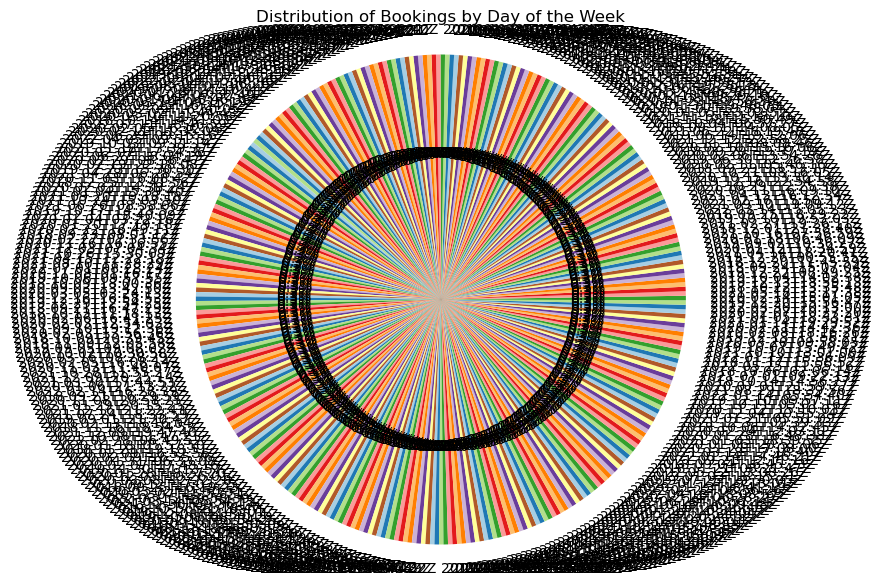

In [8]:

# Extract the day of the week from booking_date
#bookings['day_of_week'] = bookings['booking_time'].dt.day_name()

# Count the number of bookings for each day of the week
bookings_by_day = bookings['booking_time'].value_counts()

# Print the counts
print("Number of bookings by day of the week:")
print(bookings_by_day)

# Get the day(s) with the highest number of bookings
max_bookings = bookings_by_day.max()
days_with_max_bookings = bookings_by_day[bookings_by_day == max_bookings].index.tolist()

# Print the result
print(f"Day(s) with the highest number of bookings: {days_with_max_bookings}")

# Plot a pie chart to show the distribution of bookings by day of the week
plt.figure(figsize=(10, 7))
plt.pie(bookings_by_day, labels=bookings_by_day.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of Bookings by Day of the Week')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


4. for each of the service names, display the total number of bookings and the total 
Gross Booking Value in INR. 

In [9]:

service_summary = bookings.groupby('service_name').agg(
    total_bookings=pd.NamedAgg(column='booking_id', aggfunc='count'),
    total_gbv_inr=pd.NamedAgg(column='INR_Amount', aggfunc='sum')
).reset_index()


print(service_summary)


  service_name  total_bookings  total_gbv_inr
0      GOIBIBO             186     5897637.97
1          MMT              48      665669.08
2        YATRA             105     3378702.13


5. for customers who have more than 1 booking, which is the most booked route 
(from_city to to_city)?

In [10]:

# Count the number of bookings for each customer
customer_booking_counts = bookings.groupby('customer_id')['booking_id'].count()

# Filter customers with more than one booking
customers_with_multiple_bookings = customer_booking_counts[customer_booking_counts > 1].index

# Filter the bookings DataFrame to include only these customers
bookings_multiple = bookings[bookings['customer_id'].isin(customers_with_multiple_bookings)].copy()

# Create a route column using .loc to avoid the SettingWithCopyWarning
bookings_multiple.loc[:, 'route'] = bookings_multiple['from_city'] + ' to ' + bookings_multiple['to_city']

# Count the number of bookings for each route
route_counts = bookings_multiple['route'].value_counts()

# Find the most booked route
most_booked_route = route_counts.idxmax()
most_booked_route_count = route_counts.max()

# Print the result
print(f"The most booked route for customers with more than one booking is: {most_booked_route} with {most_booked_route_count} bookings")


The most booked route for customers with more than one booking is: Gurgaon to Roissy-en-France with 5 bookings


6. which are the top 3 departure cities from where customers book mostly in advance, 
provided that there have been at least 5 departures from that city? 
 

In [11]:


# Count the number of departures from each city
departure_counts = bookings['from_city'].value_counts()

# Filter cities with at least 5 departures
eligible_cities = departure_counts[departure_counts >= 5].index

# Filter the DataFrame to include only these cities
filtered_bookings = bookings[bookings['from_city'].isin(eligible_cities)]

# Calculate the average days to departure for each city
average_advance_time = filtered_bookings.groupby('from_city')['days_to_departure'].mean()

# Sort the cities by average advance booking time in descending order and get the top 3
top_3_cities = average_advance_time.sort_values(ascending=False).head(3)

# Print the result
print("Top 3 departure cities with the highest average booking advance time:")
print(top_3_cities)


Top 3 departure cities with the highest average booking advance time:
from_city
Bālāpur       46.166667
Devanhalli    29.583333
Chennai       26.187500
Name: days_to_departure, dtype: float64


7. Plot a heatmap displaying correlations of the numerical column and report which 
pair of numerical columns in the bookings data set, have the maximum correlation?

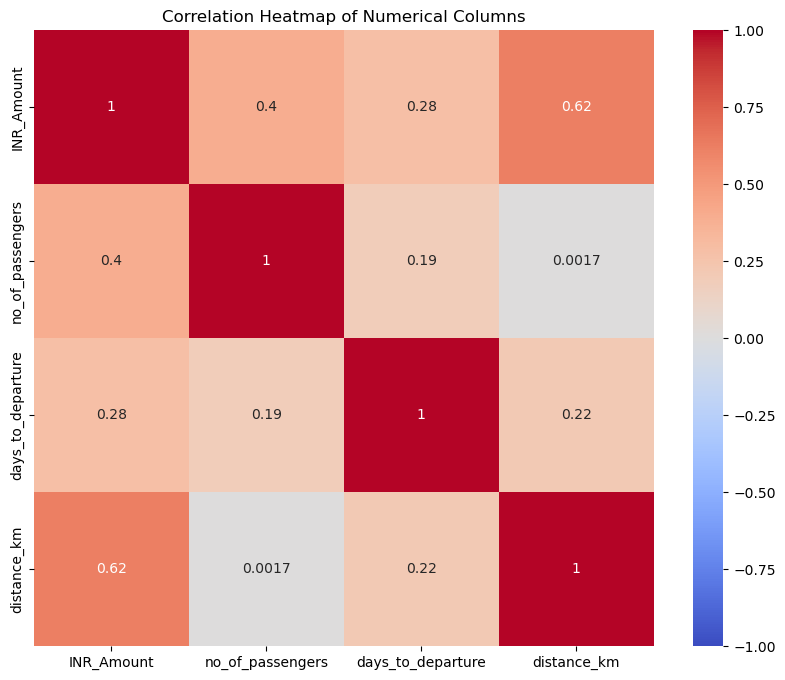

The pair of numerical columns with the maximum correlation is: ('INR_Amount', 'distance_km') with a correlation of 0.62


In [12]:

# Select only the numerical columns for correlation analysis
numerical_cols = ['INR_Amount', 'no_of_passengers', 'days_to_departure', 'distance_km']

# Calculate the correlation matrix
correlation_matrix = bookings[numerical_cols].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()

# Unstack the correlation matrix to find the highest correlation pair
correlation_unstacked = correlation_matrix.unstack()
# Filter out the self-correlations by keeping only the upper triangle of the matrix
correlation_filtered = correlation_unstacked[correlation_unstacked.index.get_level_values(0) != correlation_unstacked.index.get_level_values(1)]
# Find the pair with the maximum correlation
max_correlation_pair = correlation_filtered.idxmax()
max_correlation_value = correlation_filtered.max()

# Print the result
print(f"The pair of numerical columns with the maximum correlation is: {max_correlation_pair} with a correlation of {max_correlation_value:.2f}")


8. For each service, which is the most used device type for making bookings on the 
platform?

In [13]:
# Group the data by service and device type, then count the number of bookings for each group
device_usage = bookings.groupby(['service_name', 'device_type_used']).size().reset_index(name='booking_count')

# Find the device type with the maximum number of bookings for each service
max_device_usage = device_usage.loc[device_usage.groupby('service_name')['booking_count'].idxmax()]

# Display the result
print(max_device_usage)

  service_name device_type_used  booking_count
2      GOIBIBO              IOS             70
5          MMT          Desktop             30
9        YATRA          Desktop             51


9. Plot the trends at a quarterly frequency for the number of bookings by each of the 
device types, that is, plot a time series for each year and quarter showing the 
number of bookings performed by each device type. 

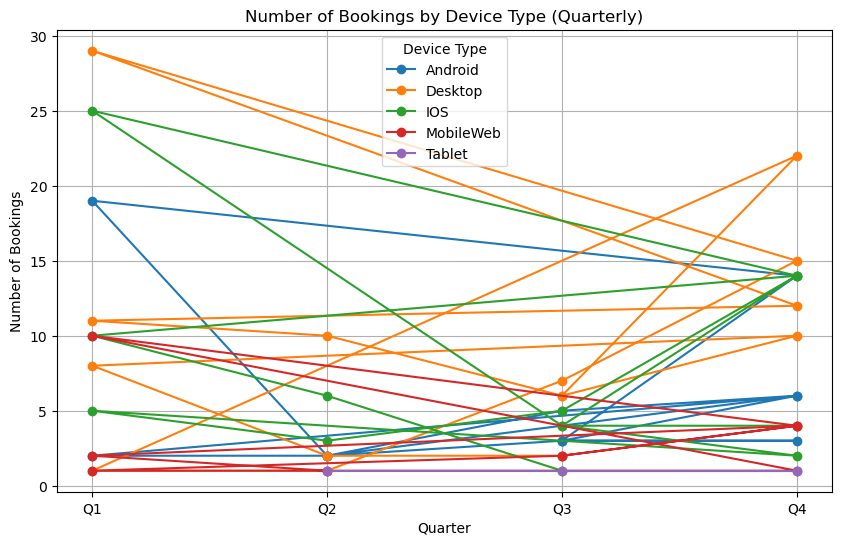

In [14]:
# Convert booking_time to datetime
bookings['booking_time'] = pd.to_datetime(bookings['booking_time'])

# Extract year and quarter
bookings['year'] = bookings['booking_time'].dt.year
bookings['quarter'] = bookings['booking_time'].dt.quarter

# Group by year, quarter, and device type, then count the number of bookings for each group
quarterly_device_bookings = bookings.groupby(['year', 'quarter', 'device_type_used']).size().reset_index(name='booking_count')

# Plot a time series for each device type
fig, ax = plt.subplots(figsize=(10, 6))

for device_type, data in quarterly_device_bookings.groupby('device_type_used'):
    data.plot(x='quarter', y='booking_count', label=device_type, ax=ax, marker='o')

plt.title('Number of Bookings by Device Type (Quarterly)')
plt.xlabel('Quarter')
plt.ylabel('Number of Bookings')
plt.xticks(range(1, 5), ['Q1', 'Q2', 'Q3', 'Q4'])
plt.legend(title='Device Type')
plt.grid(True)
plt.show()

10. Consider the following example: 
12 customers performed a total of 100 searches but only a few of them performed 
10 bookings in total. 
Searches = 100 bookings = 10 customers = 12 
The overall booking to search ratio, Ober, is 10/100 = 0.1 Using the above 
information/context, answer the following: 
• What is the average oBSR for each month of the year? 
• What is the average oBSR for each day of the week? 
• Plot a time series of oBSR on all the given dates. 

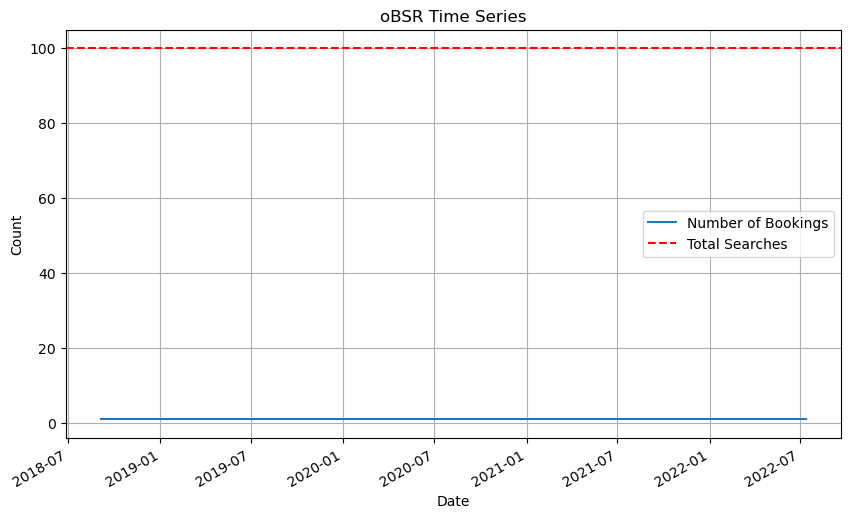

Average oBSR by Month:
0.28250000000000003

Average oBSR by Day of the Week:
0.4842857142857144


In [15]:

# Assuming there are 100 searches in total
total_searches = 100

# Group bookings by month and count the number of bookings in each month
bookings['month'] = bookings['booking_time'].dt.month
bookings_by_month = bookings.groupby('month')['booking_id'].count()

# Calculate oBSR for each month
oBSR_by_month = bookings_by_month / total_searches

# Calculate average oBSR for each month
average_oBSR_by_month = oBSR_by_month.mean()

# Group bookings by day of the week and count the number of bookings on each day
bookings['day_of_week'] = bookings['booking_time'].dt.dayofweek
bookings_by_day = bookings.groupby('day_of_week')['booking_id'].count()

# Calculate oBSR for each day of the week
oBSR_by_day = bookings_by_day / total_searches

# Calculate average oBSR for each day of the week
average_oBSR_by_day = oBSR_by_day.mean()

# Plot oBSR time series
plt.figure(figsize=(10, 6))
bookings.groupby('booking_time').size().plot(label='Number of Bookings')
plt.axhline(y=total_searches, color='r', linestyle='--', label='Total Searches')
plt.title('oBSR Time Series')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()

# Output results
print("Average oBSR by Month:")
print(average_oBSR_by_month)
print("\nAverage oBSR by Day of the Week:")
print(average_oBSR_by_day)
